$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder ,LabelEncoder

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
train = pd.read_csv('Data/train.csv')


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3456330528.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


To see all columns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12            1824.843333                  3   
1  Scientist      19114.12                    NaN                  3   
2  Scientist      19114.12                    NaN                  3   
3  Scientist      19114.12                    NaN                  3   
4  Scientist      19114.12            1824.843333                  3   
5  Scientist      19114.12                    NaN                  3   
6  Scientist      19114.12            1824.843333                  3   
7  Scientist      19114.12            1824.843333                  3   
8    _______      34847.84            3037.986667                  2   
9    Teacher      34847.84            3037.986667                  2   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              3           4   
5                4              3           4   
6                4              3           4   
7                4              3           4   
8                4              6           1   
9                4              6           1   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...                    8   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
7  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
8                                Credit-Builder Loan                    3   
9                                Credit-Builder Loan                    7   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   
5                      4                 9.27                   4.0   
6                     8_                11.27                   4.0   
7                      6                11.27                   4.0   
8                      4                 5.42                   2.0   
9                      1                 7.42                   2.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

To display percentage null in each column

In [ ]:
train.isnull().sum()/train.shape[0]*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [ ]:
train.shape

(100000, 28)

copy data to keep original data without any change  if i missed any thig

In [ ]:
df=train.copy()

In [ ]:
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


# Handle Inconsistency

Drop columns that are not essential

In [ ]:
df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan'],axis=1,inplace=True)

convert age to numeric and mantain any different value and take absolute if is exist negative value according to logic

In [ ]:
df['Age'] = df['Age'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Age'] = abs(pd.to_numeric(df['Age'], errors='coerce'))

In [ ]:
df['Age'].dtype

dtype('int64')

In [ ]:
df['Age'].isnull().sum()

0

Handle occupation column and replace and irregular value with null

In [ ]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Occupation'].isnull().sum()

7062

In column Annual Income must handle irregural valures and take absolute because it is not logic to put annual income with negative values

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Annual_Income'] = abs(pd.to_numeric(df['Annual_Income'], errors='coerce'))

In column num of loan must handle irregural valures and take absolute because it is not logic to put number  with negative values

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Num_of_Loan'] = abs(pd.to_numeric(df['Num_of_Loan'], errors='coerce'))


it is not logic to put number of time wth negative values so must handle negative values in delay from due date column

In [ ]:

df['Delay_from_due_date'] = abs(df['Delay_from_due_date'])

it is not logic to put number of time wth negative values so must handle negative values in Num_of_Delayed_Payment

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Num_of_Delayed_Payment'] = abs(pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce'))

there are strong correlation between annual income and monthly inhand salary so we can each of other

In [ ]:
df.drop(['Monthly_Inhand_Salary'],inplace=True,axis=1)


Replace irregural values with nan

In [ ]:
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'].isnull().sum()

20195

this column has inconsisten and negative values that is consider not logic so i maintain these values

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Outstanding_Debt'] = abs(pd.to_numeric(df['Outstanding_Debt'], errors='coerce'))

Also this column has inconsisten and negative values that is consider not logic so i maintain these values

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Changed_Credit_Limit'] = abs(pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce'))

In [ ]:
df['Changed_Credit_Limit'].isnull().sum()

2091

I express about years using month and convert this column to numeric values

In [ ]:
df['Credit_History_Age'].dtype

dtype('O')

In [ ]:
def convert_to_months(text):
    if isinstance(text, str):
        parts = text.split(" and ")
        years = int(parts[0].split()[0])
        months = int(parts[1].split()[0])
        return years * 12 + months
    return None
df['Credit_History_Age']=df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

we have two class in this feature yes or no and i dicovered value NM and replace it with null

In [ ]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM',np.nan)

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64

## Amount_invested_monthly

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Amount_invested_monthly'] = abs(pd.to_numeric(df['Amount_invested_monthly'], errors='coerce'))

in Payment_Behaviour coluumn are founded unkown values replace them with null

In [ ]:
def replace_null(text):
    if text=='!@9#%8':
        text=np.nan
    return text
df['Payment_Behaviour']=df['Payment_Behaviour'].apply(replace_null)

In [ ]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

Monthly_Balance,in this column should maintain inconsistent and negative values

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Monthly_Balance'] = abs(pd.to_numeric(df['Monthly_Balance'], errors='coerce'))

## check duplicates

In [ ]:
df.duplicated().sum()

0

## Statistical analysis

In [ ]:
df.describe()

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
count  100000.000000   1.000000e+05      100000.000000     100000.00000   
mean      119.509700   1.764157e+05          17.091280         22.47443   
std       684.757313   1.429618e+06         117.404834        129.05741   
min        14.000000   7.005930e+03          -1.000000          0.00000   
25%        25.000000   1.945750e+04           3.000000          4.00000   
50%        34.000000   3.757861e+04           6.000000          5.00000   
75%        42.000000   7.279092e+04           7.000000          7.00000   
max      8698.000000   2.419806e+07        1798.000000       1499.00000   

       Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count  100000.000000  100000.000000        100000.000000   
mean       72.466040      10.761960            21.095040   
std       466.422621      61.789933            14.822802   
min         1.000000       0.000000             0.000000   
25%         8.000000       2.000000            10.000000   
50%        13.000000       3.000000            18.000000   
75%        20.000000       6.000000            28.000000   
max      5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            92998.000000          97909.000000          98035.000000   
mean                30.946268             10.465678             27.754251   
std                226.028754              6.670732            193.177339   
min                  0.000000              0.000000              0.000000   
25%                  9.000000              5.350000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.870000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000        90970.000000   
mean        1426.220376                 32.285173          221.195405   
std         1155.129026                  5.116875           99.741364   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000             91216.000000     97123.000000  
mean           1403.118217               195.539456       402.164483  
std            8306.041270               199.564527       213.644217  
min               0.000000                 0.000000         0.007760  
25%              30.306660                72.236692       269.998334  
50%              69.249473               128.954538       336.472111  
75%             161.224249               236.815814       469.652004  
max           82331.000000              1977.326102      1602.040519

## check data type

In [ ]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

check if data balanced or not

`insights:`
- there are unbalance in more feature and that make outlier and can mislead for model

In [ ]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print("-----------------")

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
-----------------
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
-----------------
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64
-----------------
Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64
-----------------
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments   

## check `outlier` and maintain it with null values

In [ ]:

numeric_cols = df.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

df[numeric_cols.columns] = numeric_cols.mask(outliers_mask, np.nan)




## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

### count label or target to know it is balanced or not

C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\397224395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Credit_Score'],palette='bright')


<Axes: xlabel='Credit_Score', ylabel='count'>

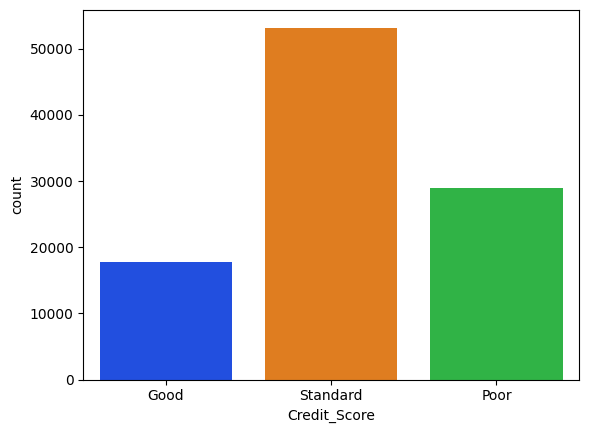

In [ ]:
sns.countplot(x=df['Credit_Score'],palette='bright')

### show if each feature correlated with label or not and have outlier or not

Age


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


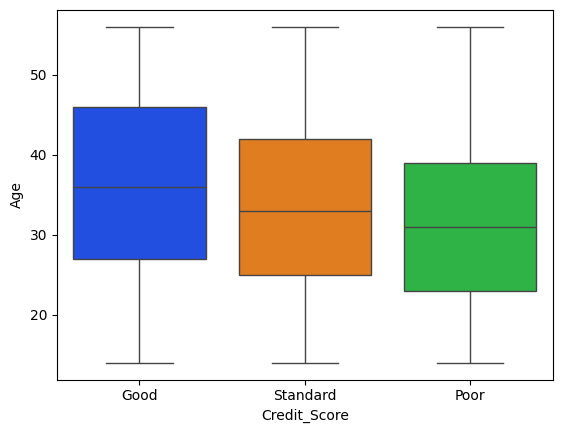

Annual_Income


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


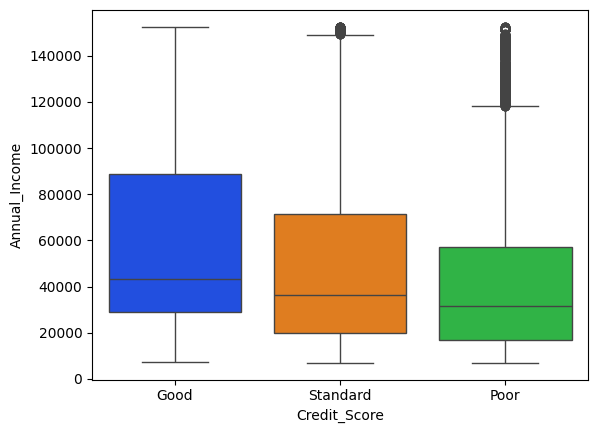

Num_Bank_Accounts


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


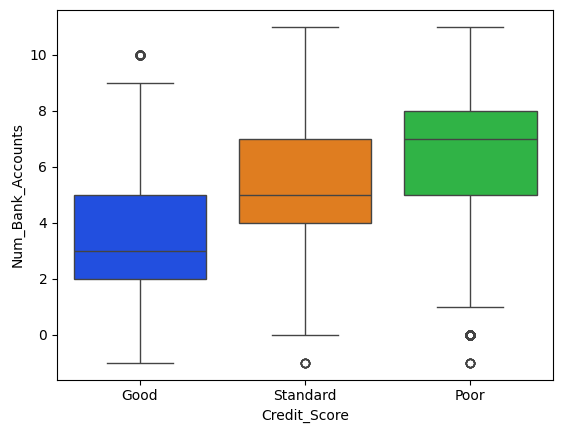

Num_Credit_Card


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


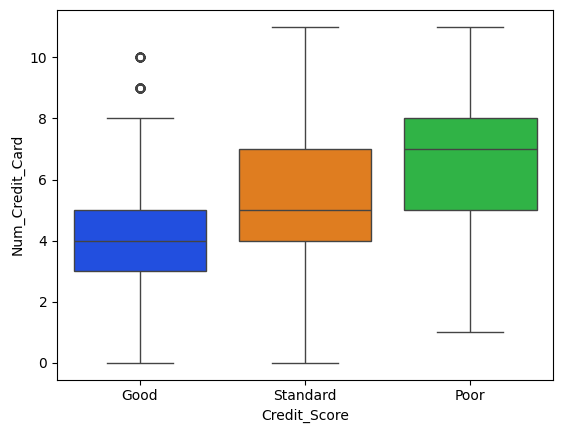

Interest_Rate


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


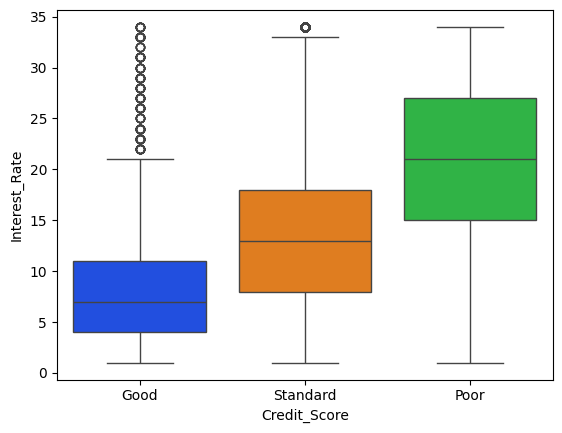

Num_of_Loan


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


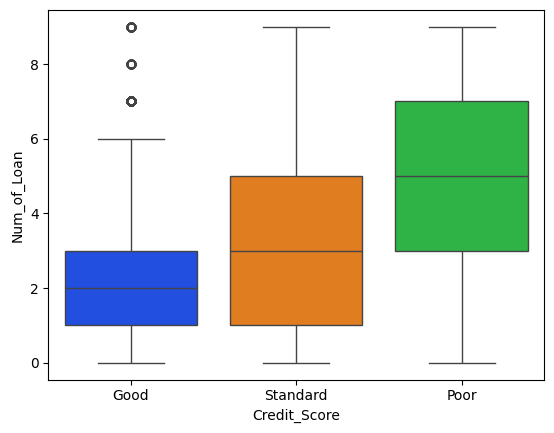

Delay_from_due_date


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


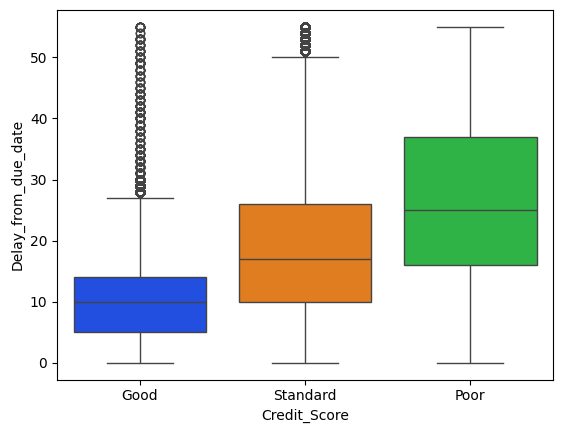

Num_of_Delayed_Payment


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


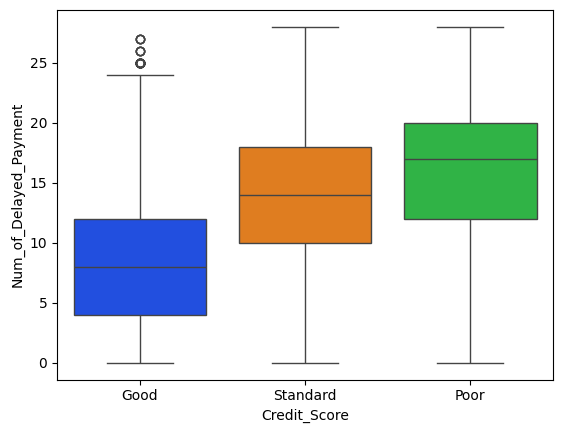

Changed_Credit_Limit


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


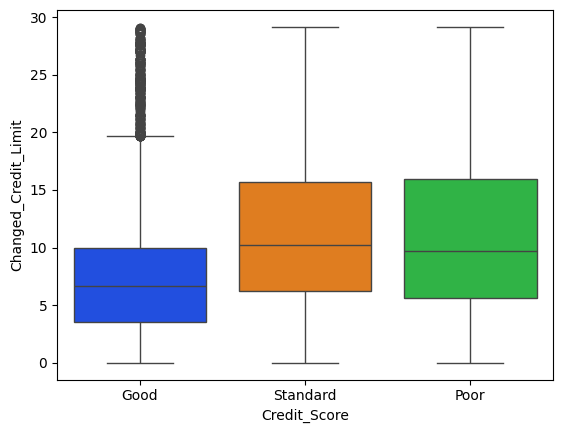

Num_Credit_Inquiries


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


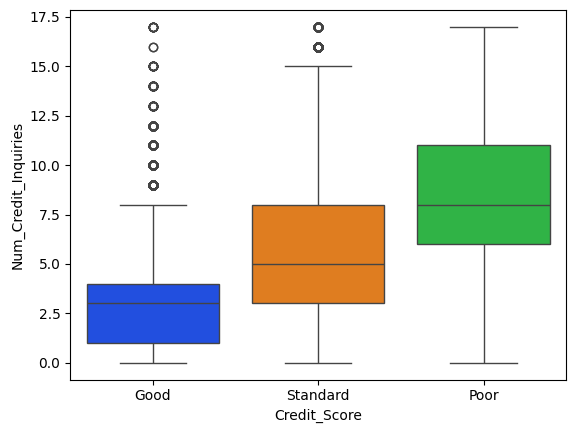

Outstanding_Debt


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


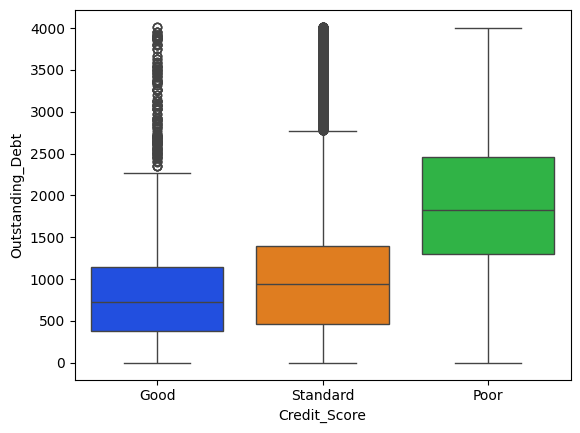

Credit_Utilization_Ratio


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


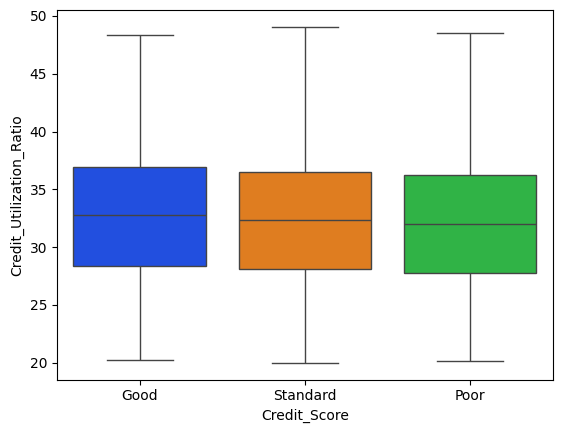

Credit_History_Age


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


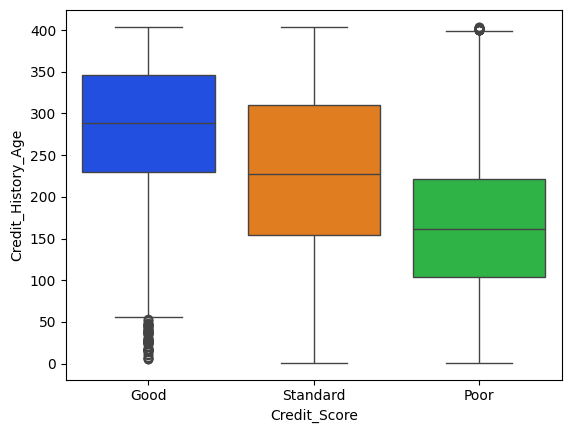

Total_EMI_per_month


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


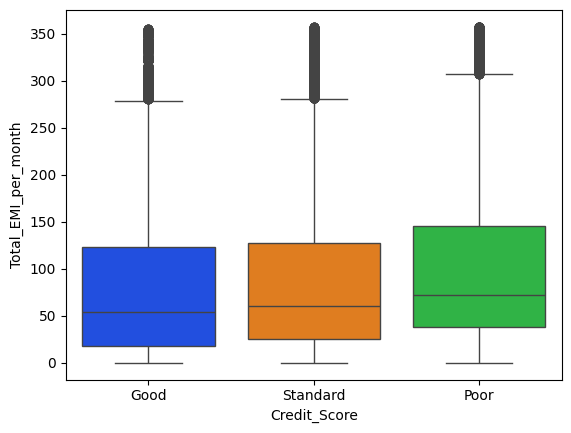

Amount_invested_monthly


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


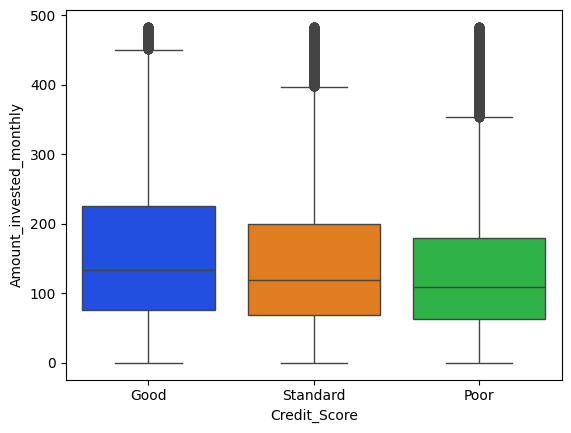

Monthly_Balance


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_13548\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


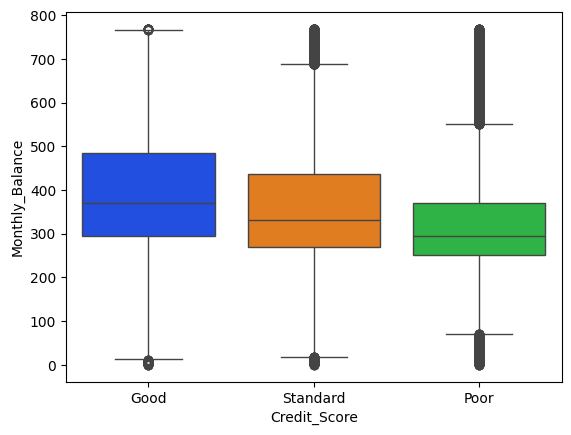

In [ ]:
for col in df.select_dtypes('number').columns:
    print(col)
    sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')
    plt.show()

`insight`
- still there are some outlier we can handle it with scaling

Month


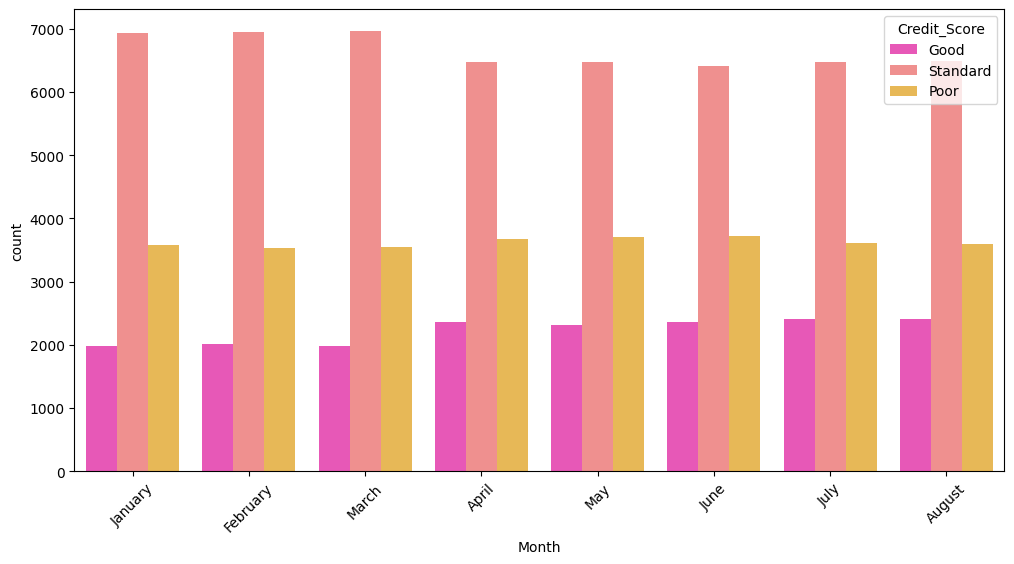

Occupation


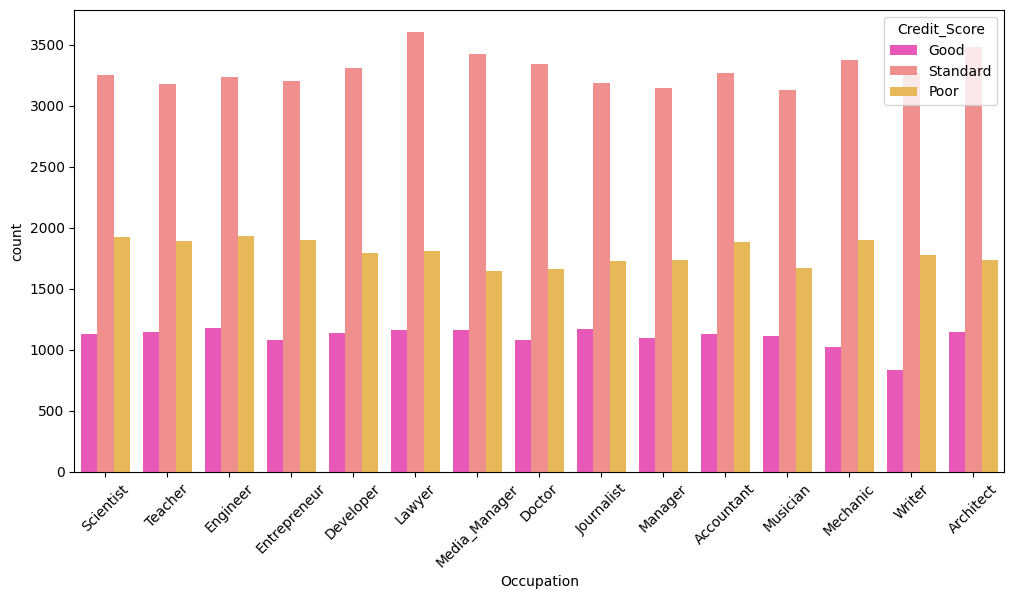

Credit_Mix


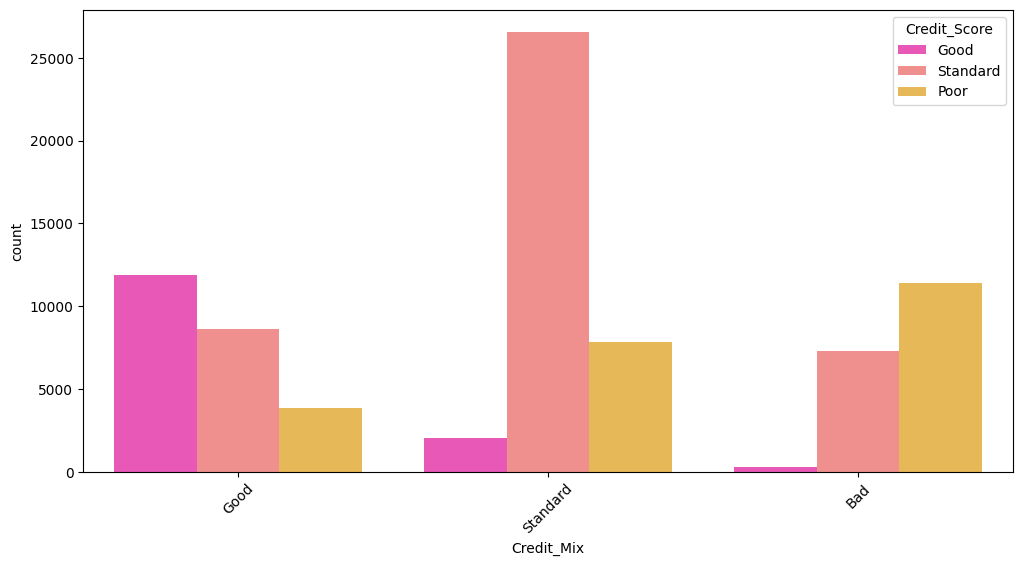

Payment_of_Min_Amount


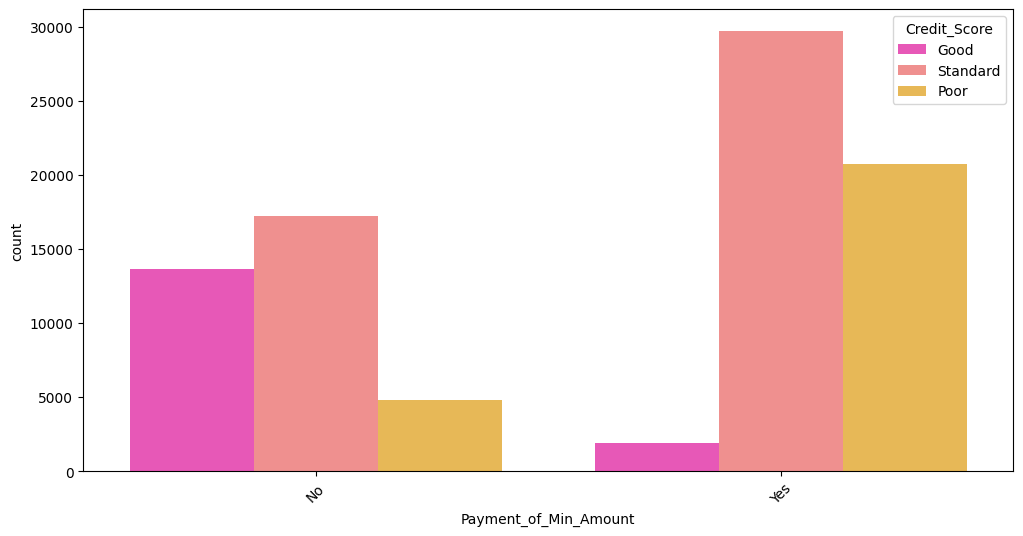

Payment_Behaviour


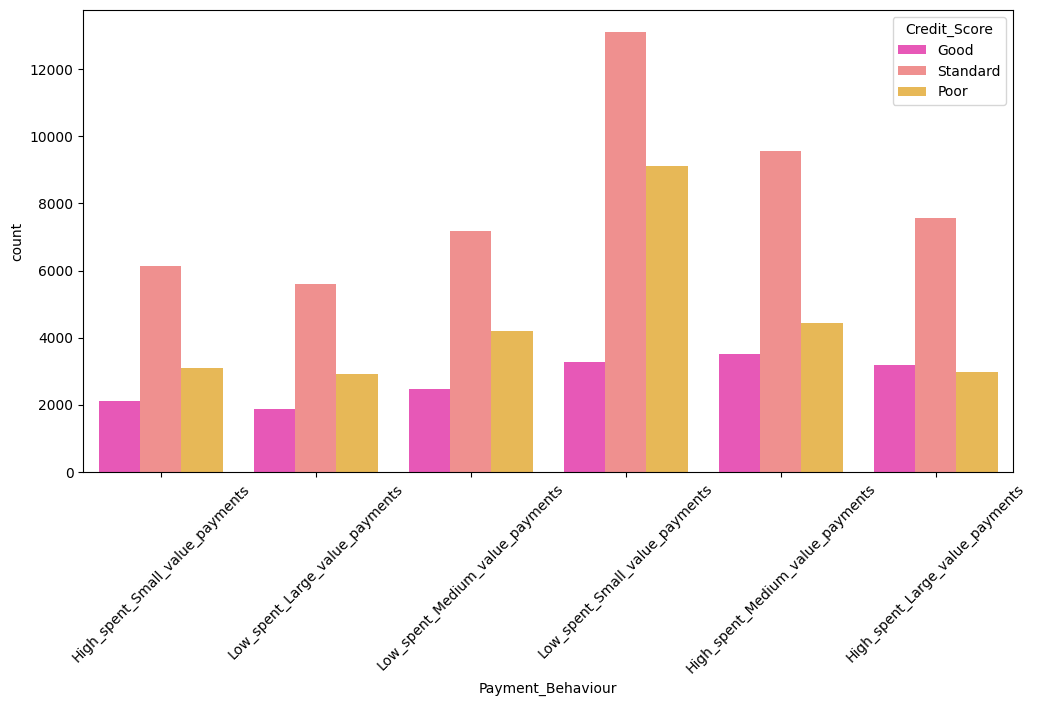

Credit_Score


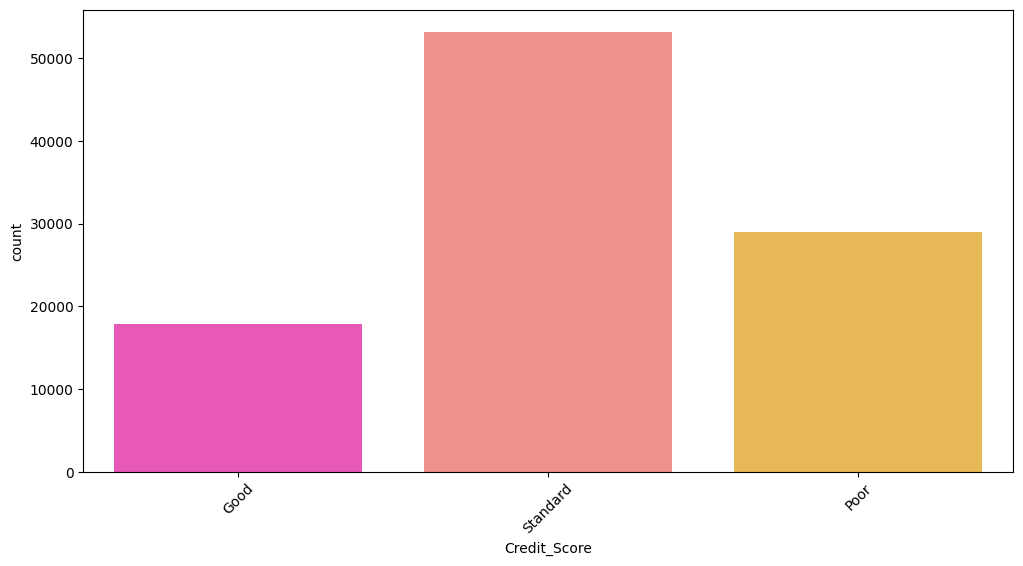

In [ ]:

for col in df.select_dtypes('object').columns:
    print(col)
    plt.figure(figsize=(12, 6))
    sns.countplot( x=df[col], hue=df['Credit_Score'], palette='spring')
    plt.xticks(rotation=45)
    plt.show()

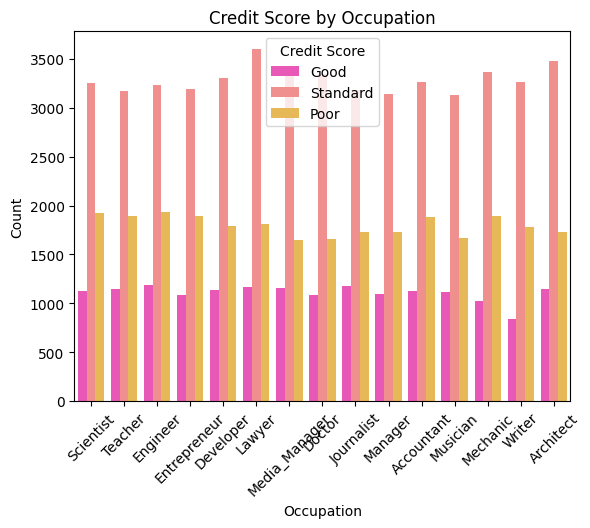

In [ ]:
sns.countplot(data=df, x='Occupation', hue='Credit_Score', palette='spring')

plt.title('Credit Score by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

Month   Age Occupation  Annual_Income  Num_Bank_Accounts  \
0       January  23.0  Scientist       19114.12                3.0   
1      February  23.0  Scientist       19114.12                3.0   
2         March   NaN  Scientist       19114.12                3.0   
3         April  23.0  Scientist       19114.12                3.0   
4           May  23.0  Scientist       19114.12                3.0   
...         ...   ...        ...            ...                ...   
99995     April  25.0   Mechanic       39628.99                4.0   
99996       May  25.0   Mechanic       39628.99                4.0   
99997      June  25.0   Mechanic       39628.99                4.0   
99998      July  25.0   Mechanic       39628.99                4.0   
99999    August  25.0   Mechanic       39628.99                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                  1.0   
2                  4.0            3.0          4.0                  3.0   
3                  4.0            3.0          4.0                  5.0   
4                  4.0            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0            NaN          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                   4.0   
1                         NaN                 11.27                   4.0   
2                         7.0                   NaN                   4.0   
3                         4.0                  6.27                   4.0   
4                         NaN                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                     NaN                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

      Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0            NaN            809.98                 26.822620   
1           Good            809.98                 31.944960   
2           Good            809.98                 28.609352   
3           Good            809.98                 31.377862   
4           Good            809.98                 24.797347   
...          ...               ...                       ...   
99995        NaN            502.38                 34.663572   
99996        NaN            502.38                 40.565631   
99997       Good            502.38                 41.255522   
99998       Good            502.38                 33.638208   
99999       Good            502.38                 34.192463   

       Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0                   265.0                    No            49.574949   
1                     NaN                    No            49.574949   
2                   267.0                    No            49.574949   
3                   268.0                    No            49.574949   
4                   269.0                    No            49.574949   
...                   ...                   ...                  ...   
99995               378.0                    No            35.104023  

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?
- ` yes, there some features have skewed distribution`

Hint: It could be helpful to check `sklearn.preprocessing` module.

# split data

In [ ]:
y=df['Credit_Score']
X=df.drop(['Credit_Score'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2/0.8,random_state=1234)

In [ ]:
print("Shape X_train : ",X_train.shape)
print("Shape X_valid : ",X_valid.shape)
print("Shape X_test : ",X_test.shape)
print("Shape y_train : ",y_train.shape)
print("Shape y_valid : ",y_valid.shape)
print("Shape y_test : ",y_test.shape)

Shape X_train :  (60000, 21)
Shape X_valid :  (20000, 21)
Shape X_test :  (20000, 21)
Shape y_train :  (60000,)
Shape y_valid :  (20000,)
Shape y_test :  (20000,)


# Encoding categorical data

# Encoding target

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train=pd.DataFrame(y_train)
label_encoder=LabelEncoder()
y_train['Credit_Score'] = label_encoder.fit_transform(y_train['Credit_Score'])

# Encoding Feature

In [ ]:
ordinal_feature=['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']

ordinal_feature_encoder=OrdinalEncoder()

X_train[ordinal_feature] = ordinal_feature_encoder.fit_transform(X_train[ordinal_feature])

In [ ]:
X_train

Month   Age  Occupation  Annual_Income  Num_Bank_Accounts  \
57148    7.0  27.0        14.0      113105.10                4.0   
25087    1.0  20.0         NaN       45941.28                6.0   
76995    0.0  30.0        13.0      117801.12                5.0   
48220    7.0  33.0         7.0       12426.29                5.0   
6264     3.0  46.0         2.0       82065.16                5.0   
...      ...   ...         ...            ...                ...   
37382    4.0  19.0         8.0       43430.88                6.0   
53326    4.0  27.0         9.0       35938.45                3.0   
95478    4.0  28.0         8.0      110692.47                4.0   
80955    0.0  33.0         NaN       38299.84                8.0   
25475    0.0  39.0         5.0       62805.48                6.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
57148              3.0           12.0          1.0                  2.0   
25087              4.0            4.0          3.0                 30.0   
76995              4.0            6.0          6.0                  5.0   
48220              4.0           13.0          3.0                 27.0   
6264               5.0            3.0          3.0                 12.0   
...                ...            ...          ...                  ...   
37382              4.0           12.0          1.0                 20.0   
53326              5.0           15.0          4.0                 18.0   
95478              6.0           18.0          6.0                  5.0   
80955              8.0           29.0          7.0                  NaN   
25475              7.0           30.0          5.0                 32.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
57148                     3.0                  7.47                   5.0   
25087                    20.0                  1.57                   7.0   
76995                    13.0                 11.40                   4.0   
48220                     NaN                 14.14                  10.0   
6264                     10.0                  5.55                   1.0   
...                       ...                   ...                   ...   
37382                    16.0                  8.54                   4.0   
53326                    14.0                  7.84                   3.0   
95478                     9.0                 12.33                   6.0   
80955                    10.0                 13.58                   6.0   
25475                    22.0                  0.85                  11.0   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
57148         1.0           1037.47                 41.905957   
25087         1.0           1279.96                 39.666607   
76995         2.0           1280.57                 27.032120   
48220         2.0           1399.81                 37.311152   
6264          1.0            106.83                 42.130135   
...           ...               ...                       ...   
37382         NaN           1288.94                 33.298253   
53326         2.0           1438.83                 25.274176   
95478         2.0           1134.69                 30.018128   
80955         NaN           1512.31                 32.237366   
25475         NaN           1584.95                 34.351740   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
57148               222.0                    0.0            50.326679   
25087               340.0                    0.0            80.894862   
76995               180.0                    1.0           326.206681   
48220               104.0                    1.0            18.801898   
6264                275.0                    0.0           180.340607   
...                   ...                    ...                  ...   
37382               217.0                    0.0            20.440818   

# Handle outliers

In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_train < lower_bound) | (X_train> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_train.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

In [ ]:



outlier_columns = [
    'Annual_Income', 'Delay_from_due_date', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

def replace_outliers_with_nan(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)


replace_outliers_with_nan(df, outlier_columns)

df.isna().sum()


Month                           0
Age                          2781
Occupation                   7062
Annual_Income                3407
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          5771
Num_of_Delayed_Payment       7738
Changed_Credit_Limit         3160
Num_Credit_Inquiries         4355
Credit_Mix                  20195
Outstanding_Debt             8768
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month          9698
Amount_invested_monthly     19687
Payment_Behaviour            7600
Monthly_Balance             14437
Credit_Score                    0
dtype: int64

## Handling Missing values

In [ ]:
X_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
min_payments_imputer = KNNImputer()
X_train[X_train.columns]= min_payments_imputer.fit_transform(X_train[X_train.columns])

In [ ]:
X_train

Month   Age  Occupation  Annual_Income  Num_Bank_Accounts  \
57148    7.0  27.0        14.0      113105.10                4.0   
25087    1.0  20.0        10.4       45941.28                6.0   
76995    0.0  30.0        13.0      117801.12                5.0   
48220    7.0  33.0         7.0       12426.29                5.0   
6264     3.0  46.0         2.0       82065.16                5.0   
...      ...   ...         ...            ...                ...   
37382    4.0  19.0         8.0       43430.88                6.0   
53326    4.0  27.0         9.0       35938.45                3.0   
95478    4.0  28.0         8.0      110692.47                4.0   
80955    0.0  33.0        10.6       38299.84                8.0   
25475    0.0  39.0         5.0       62805.48                6.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
57148              3.0           12.0          1.0                  2.0   
25087              4.0            4.0          3.0                 30.0   
76995              4.0            6.0          6.0                  5.0   
48220              4.0           13.0          3.0                 27.0   
6264               5.0            3.0          3.0                 12.0   
...                ...            ...          ...                  ...   
37382              4.0           12.0          1.0                 20.0   
53326              5.0           15.0          4.0                 18.0   
95478              6.0           18.0          6.0                  5.0   
80955              8.0           29.0          7.0                 23.8   
25475              7.0           30.0          5.0                 32.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
57148                     3.0                  7.47                   5.0   
25087                    20.0                  1.57                   7.0   
76995                    13.0                 11.40                   4.0   
48220                    18.0                 14.14                  10.0   
6264                     10.0                  5.55                   1.0   
...                       ...                   ...                   ...   
37382                    16.0                  8.54                   4.0   
53326                    14.0                  7.84                   3.0   
95478                     9.0                 12.33                   6.0   
80955                    10.0                 13.58                   6.0   
25475                    22.0                  0.85                  11.0   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
57148         1.0           1037.47                 41.905957   
25087         1.0           1279.96                 39.666607   
76995         2.0           1280.57                 27.032120   
48220         2.0           1399.81                 37.311152   
6264          1.0            106.83                 42.130135   
...           ...               ...                       ...   
37382         1.2           1288.94                 33.298253   
53326         2.0           1438.83                 25.274176   
95478         2.0           1134.69                 30.018128   
80955         1.6           1512.31                 32.237366   
25475         0.6           1584.95                 34.351740   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
57148               222.0                    0.0            50.326679   
25087               340.0                    0.0            80.894862   
76995               180.0                    1.0           326.206681   
48220               104.0                    1.0            18.801898   
6264                275.0                    0.0           180.340607   
...                   ...                    ...                  ...   
37382               217.0                    0.0            20.440818   

In [ ]:
X_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

## Scaling Data

In [ ]:
X_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

feature=[
    'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Interest_Rate', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

Quantile_transformer =StandardScaler()


X_train[feature] =Quantile_transformer.fit_transform(X_train[feature])

### visualize distribution after scaling and fillna

Month


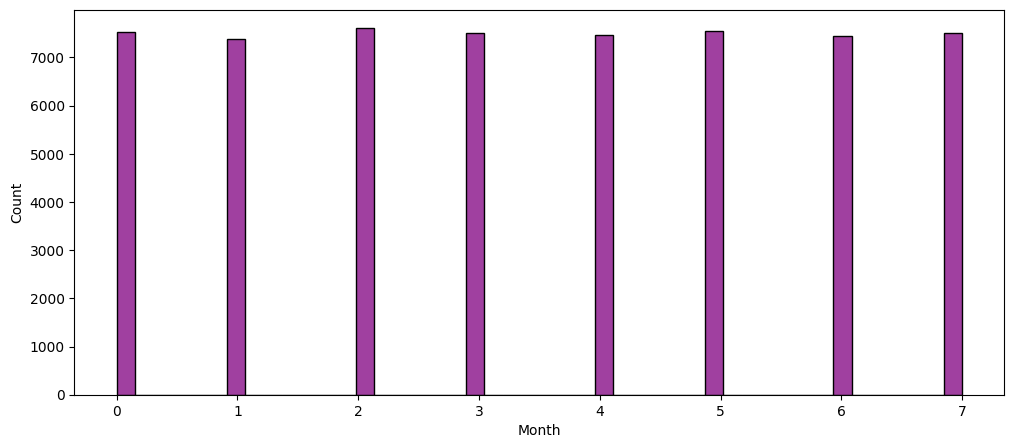

Age


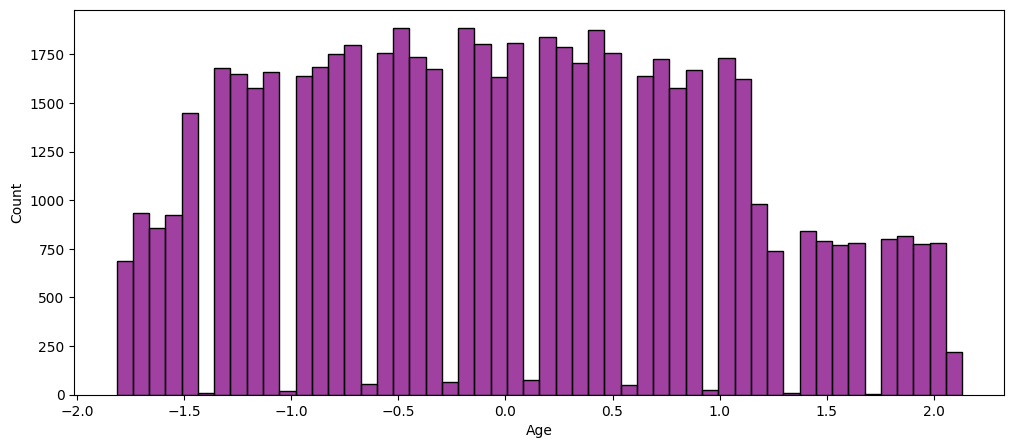

Occupation


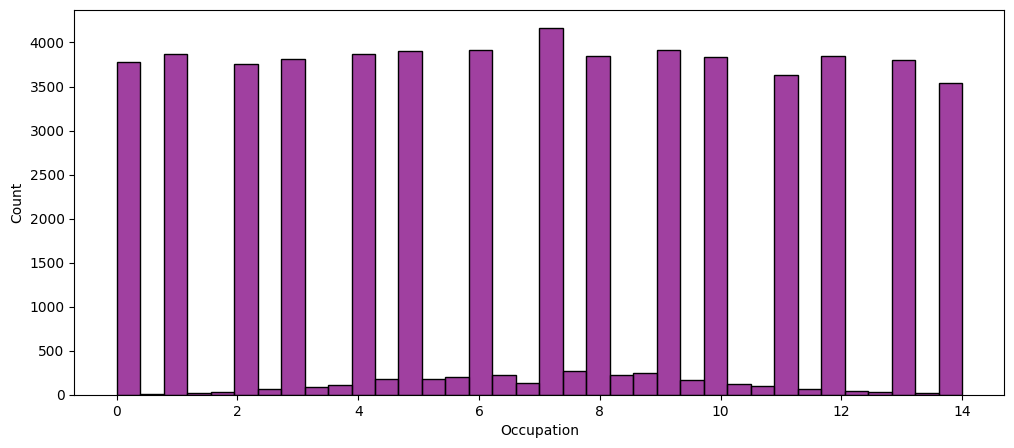

Annual_Income


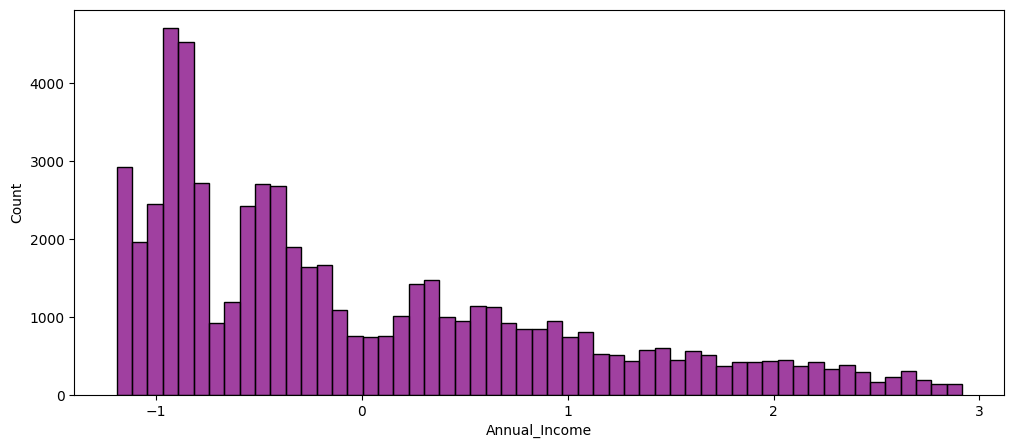

Num_Bank_Accounts


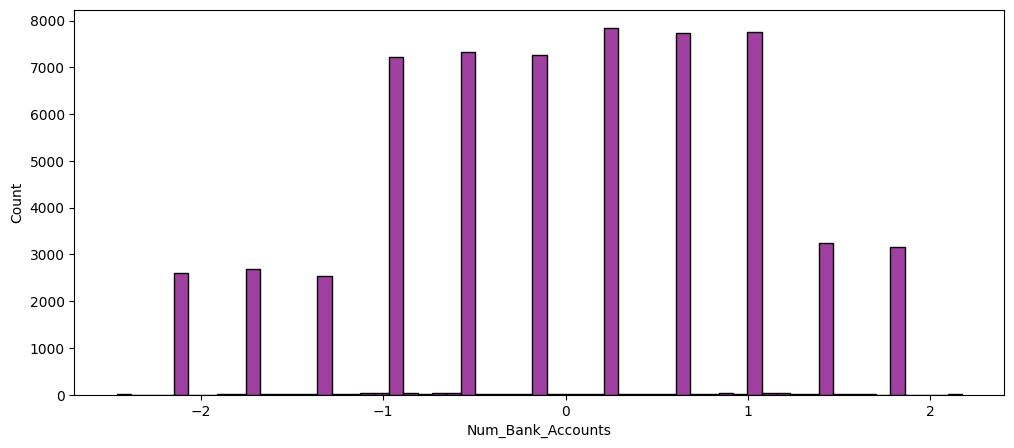

Num_Credit_Card


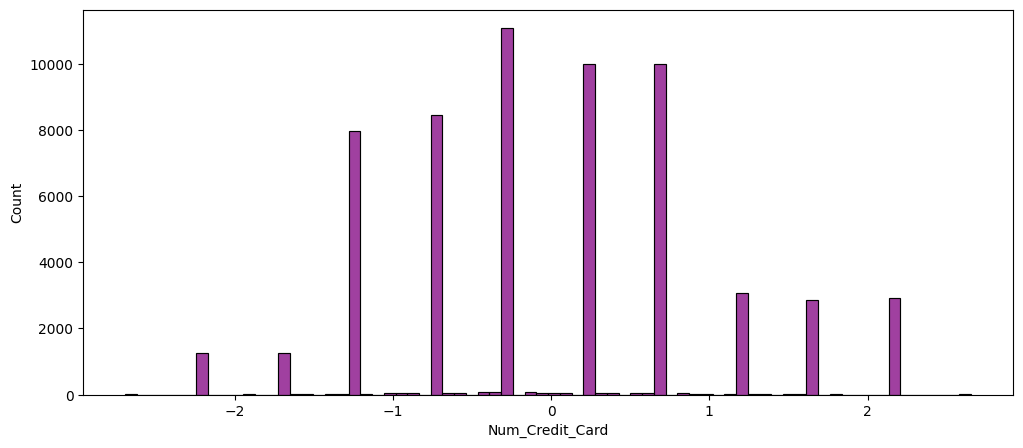

Interest_Rate


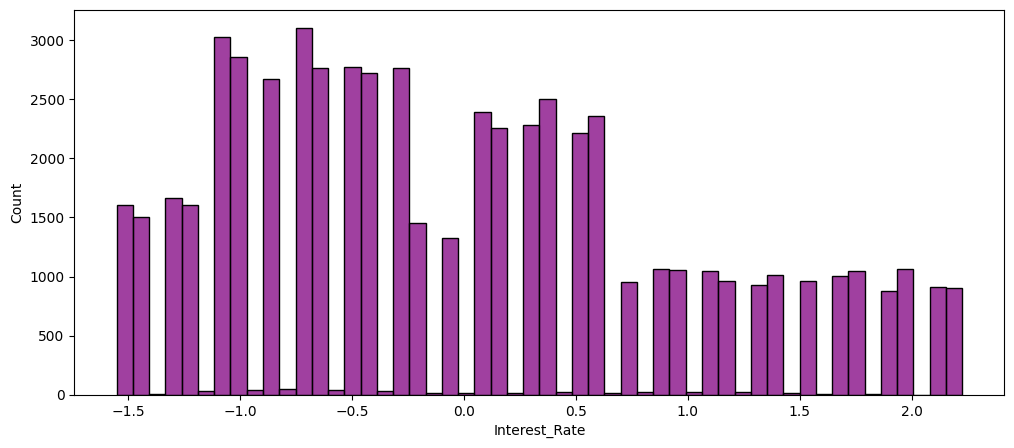

Num_of_Loan


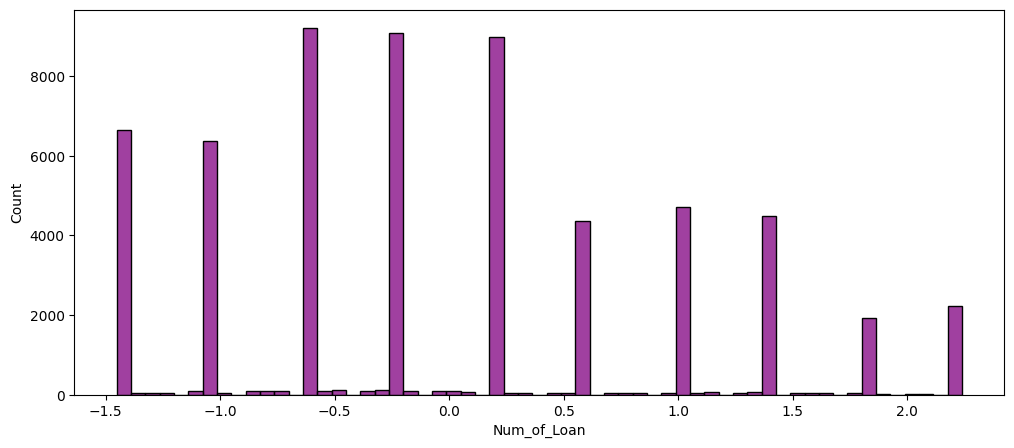

Delay_from_due_date


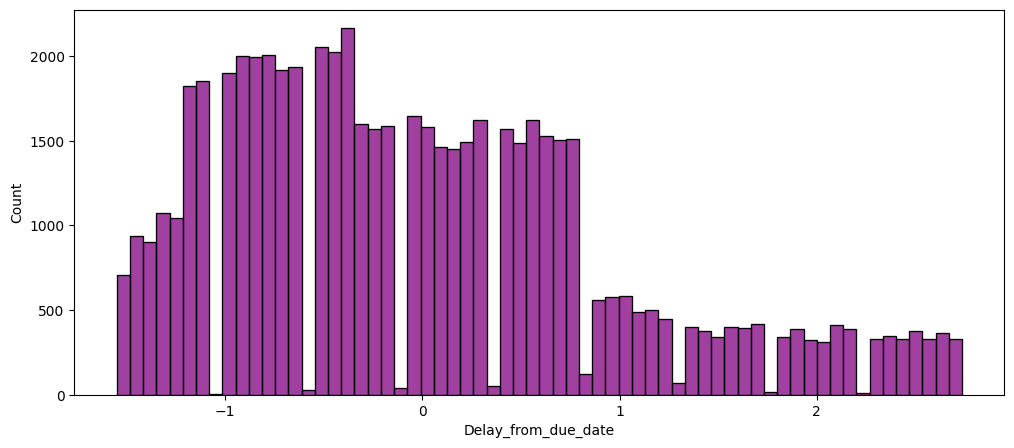

Num_of_Delayed_Payment


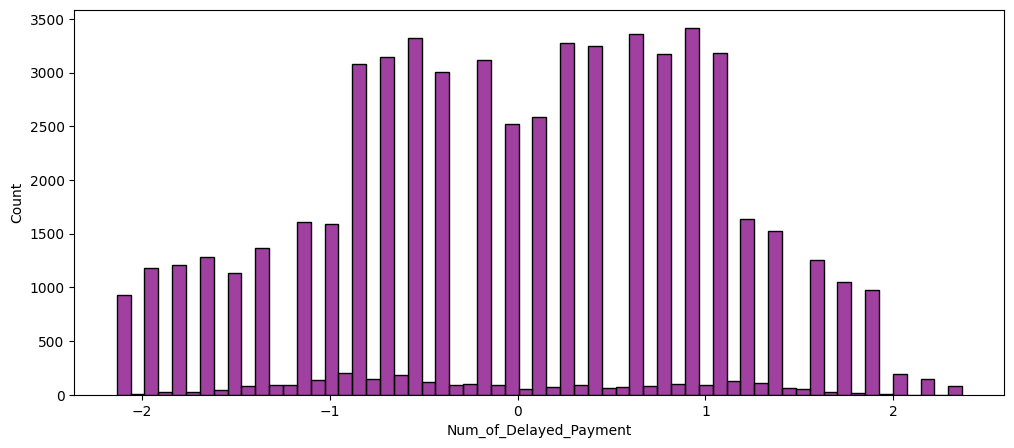

Changed_Credit_Limit


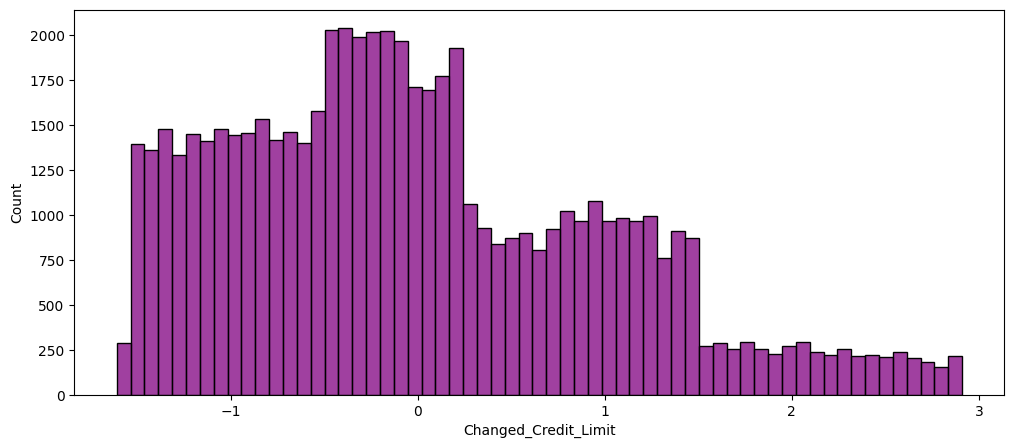

Num_Credit_Inquiries


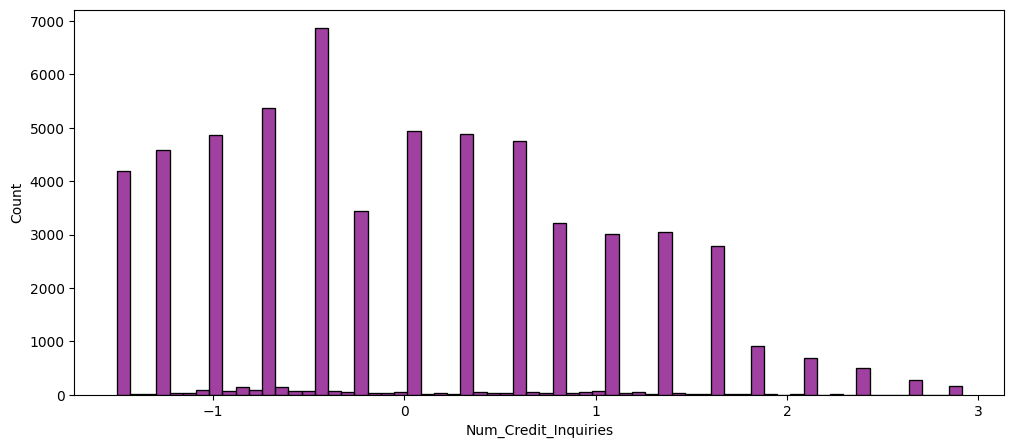

Credit_Mix


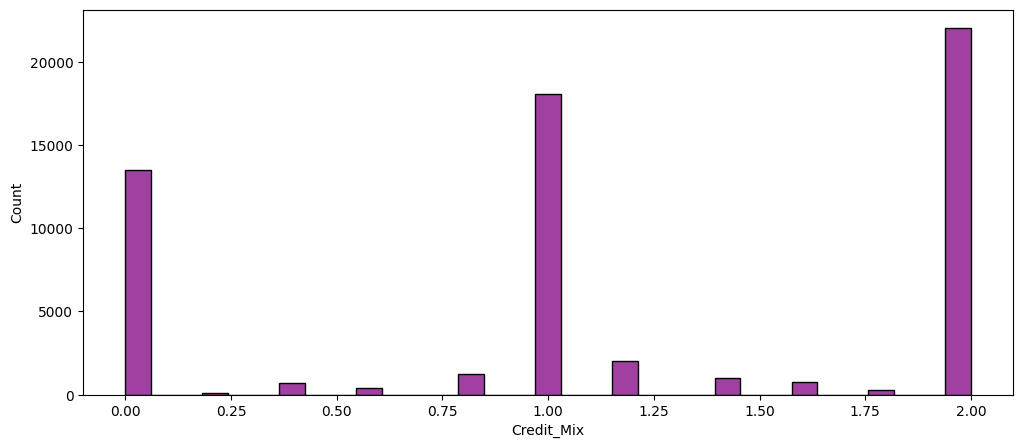

Outstanding_Debt


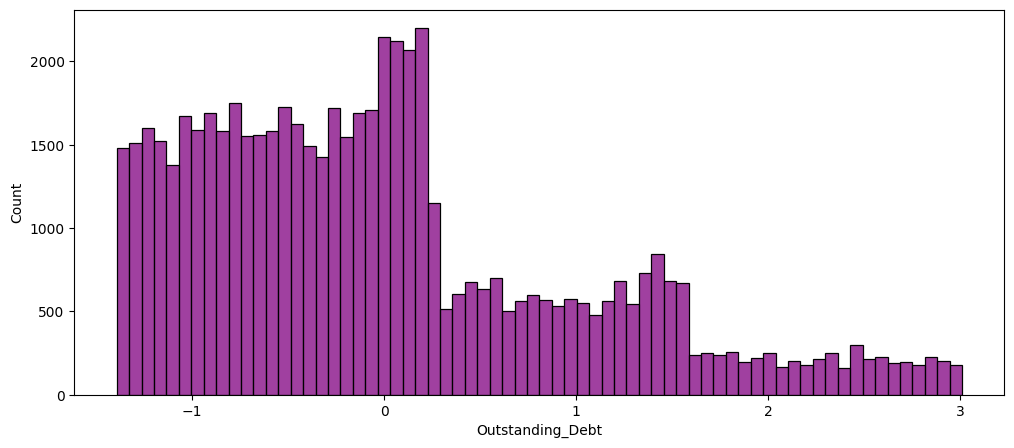

Credit_Utilization_Ratio


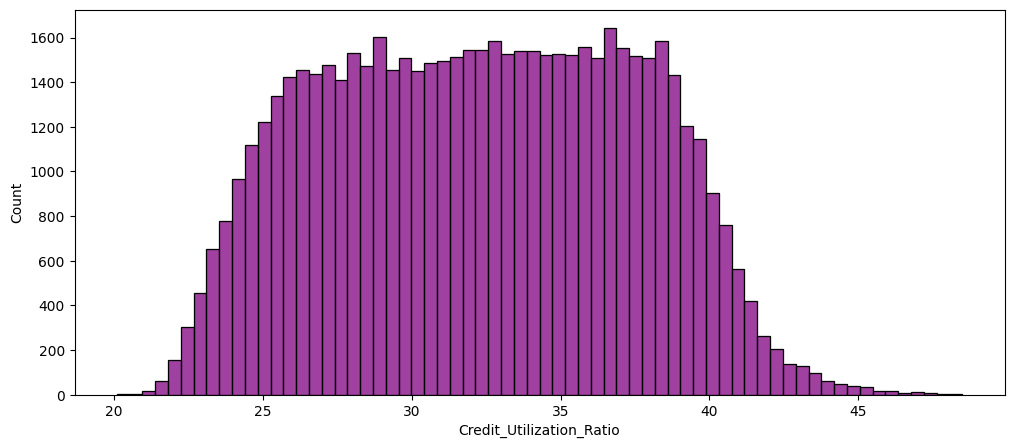

Credit_History_Age


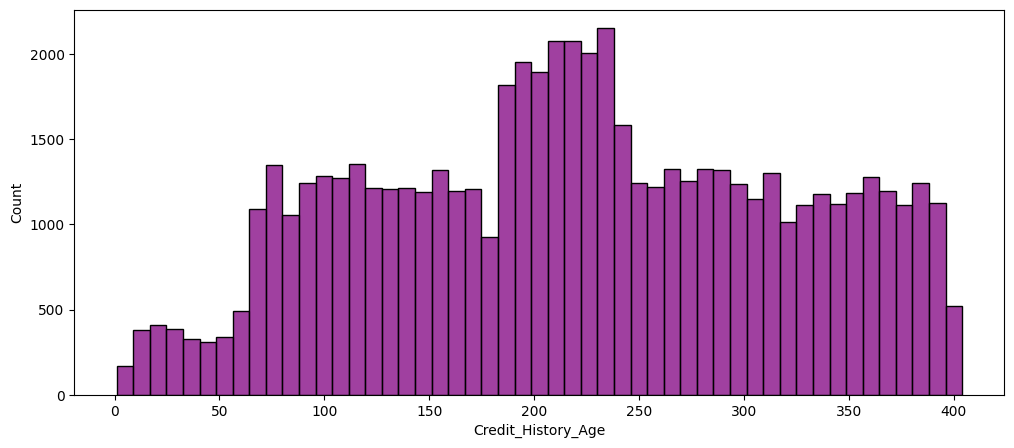

Payment_of_Min_Amount


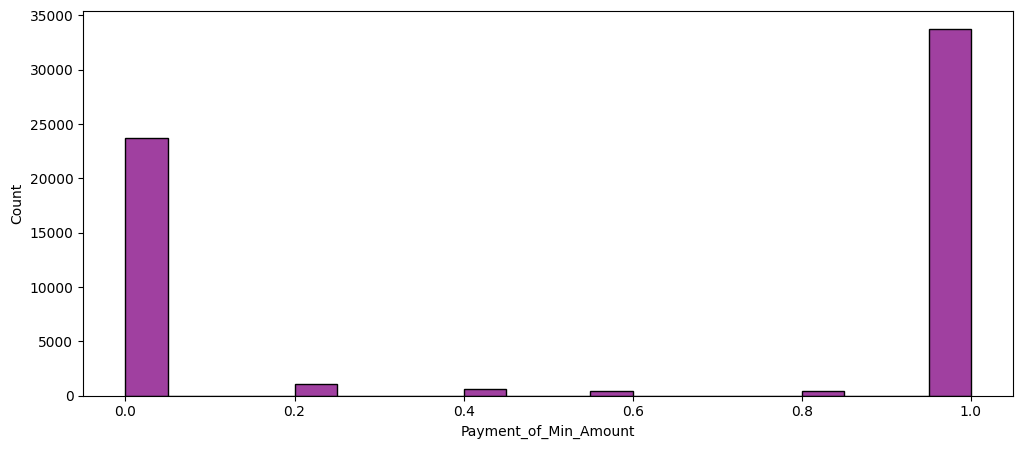

Total_EMI_per_month


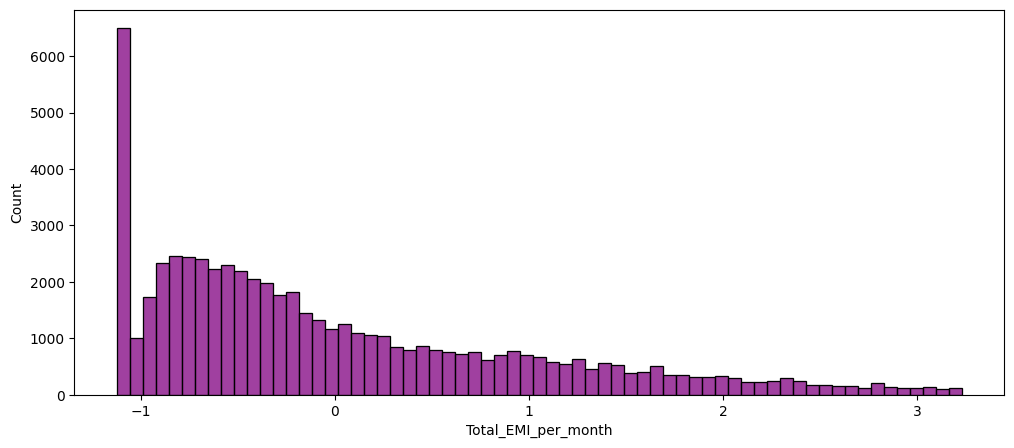

Amount_invested_monthly


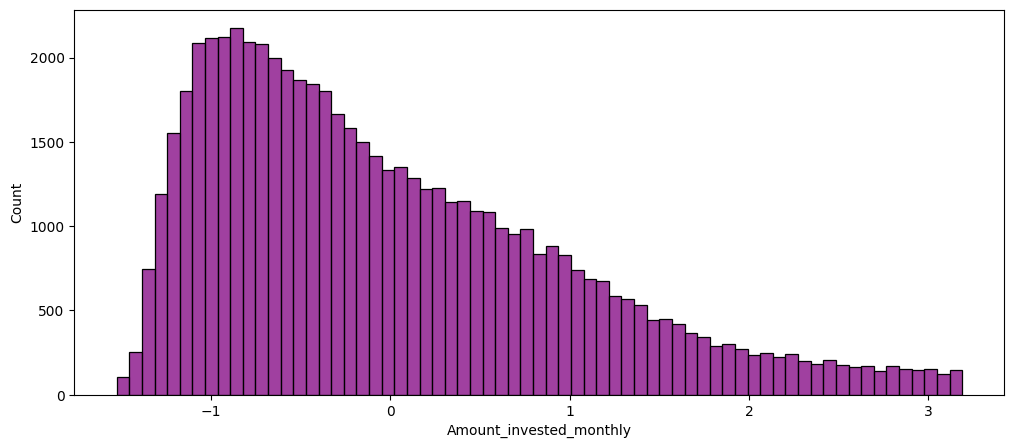

Payment_Behaviour


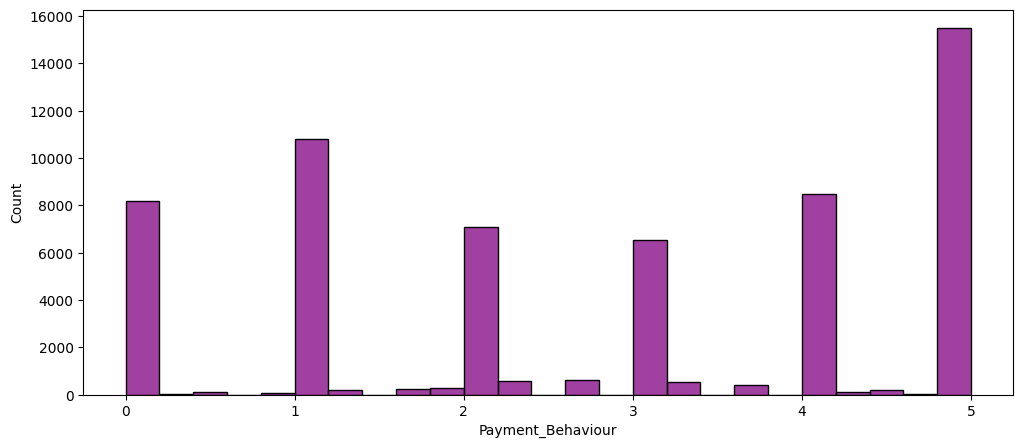

Monthly_Balance


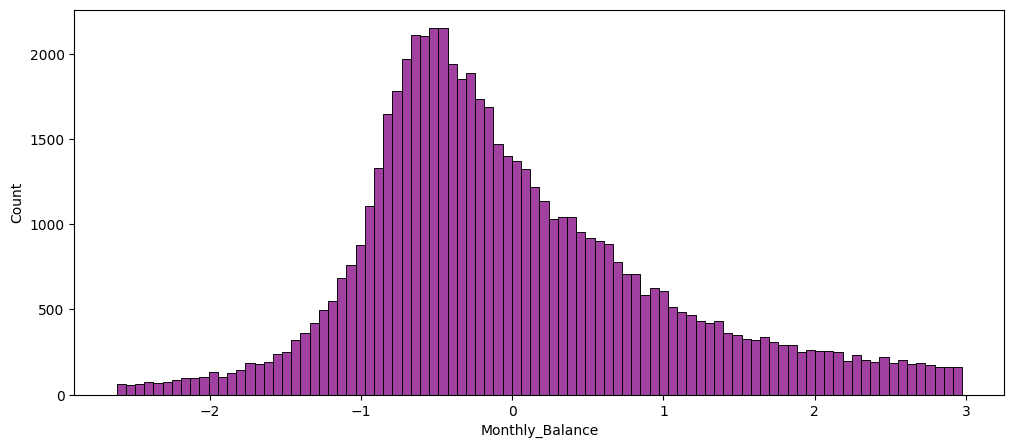

In [ ]:
for col in X_train .select_dtypes('number').columns:
    print(col)
    plt.figure(figsize=(12,5))
    sns.histplot(data=X_train ,x=col,color='purple')
    plt.show()

### visualize heatmap to explain correlation between features and each other and target

<Axes: >

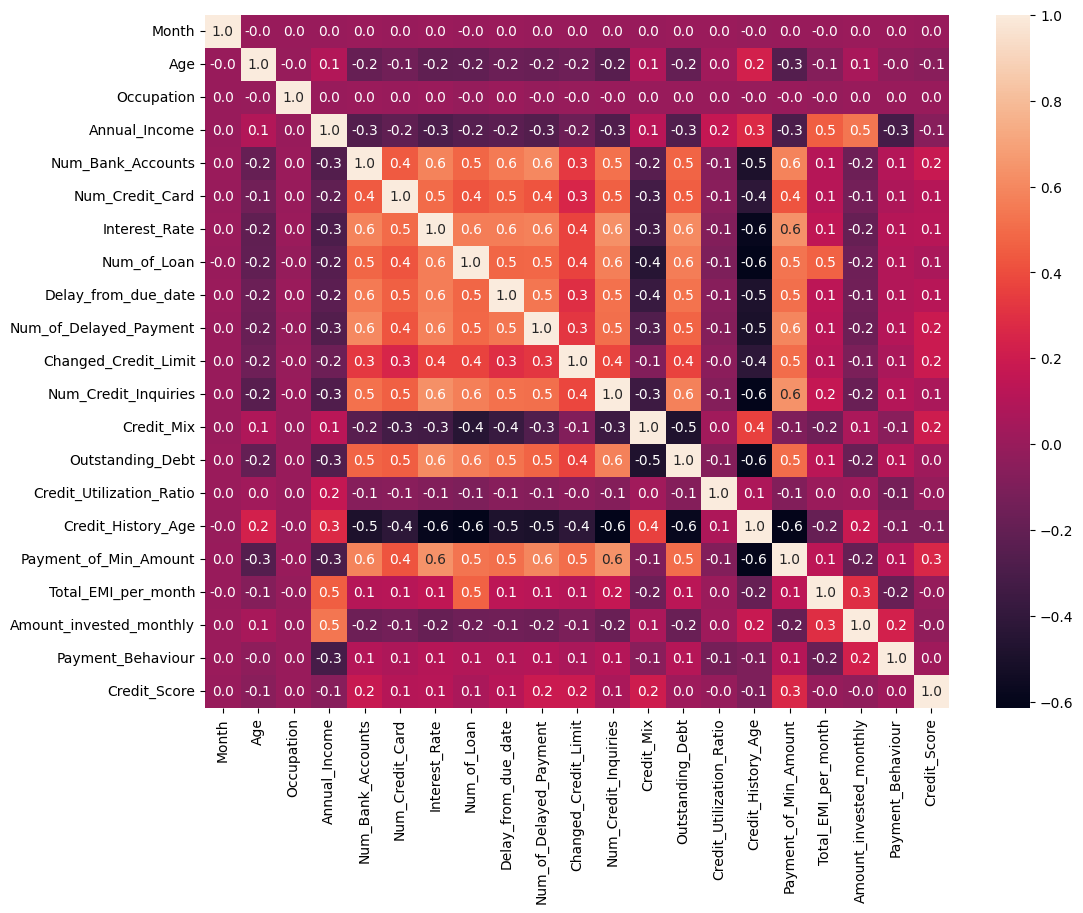

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(pd.concat((X_train.iloc[:,0:20],y_train),axis=1).corr(),annot=True,fmt='.1f')

In [ ]:
X_train.shape

(60000, 21)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

### encoding valid and test data

In [ ]:
y_test=pd.DataFrame(y_test)
y_test['Credit_Score'] = label_encoder.transform(y_test[['Credit_Score']])
y_valid=pd.DataFrame(y_valid)
y_valid['Credit_Score'] = label_encoder.transform(y_valid[['Credit_Score']])

c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:

X_valid[['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']] = ordinal_feature_encoder.transform(X_valid[ordinal_feature])

In [ ]:
X_test[['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']] = ordinal_feature_encoder.transform(X_test[ordinal_feature])

### fill null in valid and test data

In [ ]:

X_test[X_test.columns] = min_payments_imputer.transform(X_test[X_test.columns])
X_valid[X_valid.columns] = min_payments_imputer.transform(X_valid[X_valid.columns])

### scaling valid and test data

In [ ]:
X_valid[feature] =Quantile_transformer.transform(X_valid[feature])
X_test[feature] =Quantile_transformer.transform(X_test[feature])

### check outlier in valid and test data

In [ ]:
Q1 = X_valid.quantile(0.25)
Q3 = X_valid.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_valid< lower_bound) | (X_valid> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_valid.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

In [ ]:
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_test< lower_bound) | (X_test> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_test.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of/
 decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
DTC=DecisionTreeClassifier(random_state=1234)
model_DTC=DTC.fit(X_train,y_train)

In [ ]:
model_DTC.score(X_train,y_train)

1.0

In [ ]:
model_DTC.score(X_valid,y_valid)

0.68315

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [ ]:
y_pred=model_DTC.predict(X_valid)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
cnf_matrix

array([[2099,  191, 1242],
       [ 192, 3835, 1701],
       [1330, 1681, 7729]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_valid,y_pred ,average='macro')

0.6586291780395598

In [ ]:
from sklearn.metrics import  recall_score
recall_score(y_valid,y_pred ,average='macro')

0.6611483998740257

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid,y_pred ,average='macro')

0.6598553175131417

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
target_names = ['Standard','Poor','Good']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Standard       0.58      0.59      0.59      3532
        Poor       0.67      0.67      0.67      5728
        Good       0.72      0.72      0.72     10740

    accuracy                           0.68     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.68      0.68      0.68     20000



In [ ]:
model_DTC.tree_.feature

array([13, 12,  8, ..., 12, -2, -2], dtype=int64)

In [ ]:
model_DTC.tree_.threshold

array([ 0.24059401,  1.10000002, -0.37346113, ...,  1.20000002,
       -2.        , -2.        ])

In [ ]:
model_DTC.tree_.max_depth

42

In [ ]:
model_DTC.tree_.node_count

21247

In [ ]:
model_DTC.feature_names_in_

array(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance'], dtype=object)

## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

`Max depth in a decision tree helps prevent overfitting by controlling the depth of the tree during training.`

In [ ]:
DTC2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=1000)
model_DTC2 =DTC2.fit(X_train,y_train)

In [ ]:
model_DTC2.score(X_train,y_train)

0.7291833333333333

In [ ]:
model_DTC2.score(X_valid,y_valid)

0.7111

In [ ]:
y_pred=model_DTC2.predict(X_valid)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
target_names = ['Standard','Poor','Good']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Standard       0.56      0.70      0.62      3532
        Poor       0.74      0.66      0.70      5728
        Good       0.76      0.74      0.75     10740

    accuracy                           0.71     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.72      0.71      0.71     20000



In [ ]:
model_DTC2.tree_.node_count

1127

In [ ]:
model_DTC2.tree_.feature

array([13, 12, 10, ..., -2, -2, -2], dtype=int64)

## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [ ]:
params = {
    'max_depth': [5, 10, 15, 25],
    'max_features': [0.5, 0.7, 0.8, 'sqrt', 'log2'],
    'max_leaf_nodes': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', {2: 3, 1: 2, 0: 1}, None],
    'min_samples_split': [0.05, 0.1, 0.15, 0.2,0.5],
    'min_weight_fraction_leaf': [0.05, 0.1, 0.15,.2],
    'min_samples_leaf': [0.01, 0.05, 0.1, 5, 10]
}


In [ ]:
from  sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search=RandomizedSearchCV(model_DTC2,params, cv=5, verbose=10,n_iter=20, error_score='raise',random_state=1234)
random_search_model=random_search.fit(X_train,y_train)
print("best score using random_search_model : ",random_search_model.best_score_)
print("best params using random_search_model : ",random_search_model.best_params_)
print("best estimator using random_search_model : ",random_search_model.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START class_weight={2: 3, 1: 2, 0: 1}, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=0.05, min_samples_split=0.5, min_weight_fraction_leaf=0.2
[CV 1/5; 1/20] END class_weight={2: 3, 1: 2, 0: 1}, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=0.05, min_samples_split=0.5, min_weight_fraction_leaf=0.2;, score=0.607 total time=   0.1s
[CV 2/5; 1/20] START class_weight={2: 3, 1: 2, 0: 1}, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=0.05, min_samples_split=0.5, min_weight_fraction_leaf=0.2
[CV 2/5; 1/20] END class_weight={2: 3, 1: 2, 0: 1}, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=0.05, min_samples_split=0.5, min_weight_fraction_leaf=0.2;, score=0.585 total time=   0.1s
[CV 3/5; 1/20] START class_weight={2: 3, 1: 2, 0: 1}, criterion=entropy, max

In [ ]:
params = {
    'max_depth': [5, 10, 15, 25],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [0.05, 0.1, 0.15],
    'min_weight_fraction_leaf': [ 0.1, 0.15,.2],
    'min_samples_leaf': [ 0.1, 5, 10]
}


In [ ]:
from  sklearn.model_selection import RandomizedSearchCV,GridSearchCV
grid_search=GridSearchCV(model_DTC2,params, cv=5, verbose=10, error_score='raise')
grid_search_model=grid_search.fit(X_train,y_train)
print("best score using grid_search_model : ",grid_search_model.best_score_)
print("best params using grid_search_model: ",grid_search_model.best_params_)
print("best estimator using grid_search_model : ",grid_search_model.best_estimator_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV 1/5; 1/1728] START criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=0.1, min_samples_split=0.05, min_weight_fraction_leaf=0.1
[CV 1/5; 1/1728] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=0.1, min_samples_split=0.05, min_weight_fraction_leaf=0.1;, score=0.606 total time=   0.0s
[CV 2/5; 1/1728] START criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=0.1, min_samples_split=0.05, min_weight_fraction_leaf=0.1
[CV 2/5; 1/1728] END criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=0.1, min_samples_split=0.05, min_weight_fraction_leaf=0.1;, score=0.620 total time=   0.0s
[CV 3/5; 1/1728] START criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=0.1, min_samples_split=0.05, min_weight_fraction_leaf=0.1
[CV 3/5; 1/1728] END criterion=gini, max_depth=5, max

## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?
- ` yes,A high importance for "credit Score " or would make sense.`

`Q` Can you intrepet the importance of the few top features?
- `Outstanding_Debt (Most Important):`
 `This aligns with credit scoring logic—higher debt often correlates with a lower credit score because it increases financial risk.`

- `Credit_Mix:`
 `Lenders prefer borrowers with a diverse credit history (loans, mortgages, credit cards), which can improve a credit score.`
- `Interest_Rate:`
 `A high interest rate may indicate a borrower is considered high-risk, often leading to a lower credit score.`
- `Changed_Credit_Limit:`
 `Sudden changes in credit limits (either increase or decrease) can indicate financial instability or better/worse creditworthiness.`

In [ ]:
model_DTC2.feature_importances_

array([0.02650265, 0.00711728, 0.00677119, 0.01332246, 0.01054199,
       0.05225797, 0.08193558, 0.01064652, 0.08040122, 0.01653587,
       0.04810529, 0.00819905, 0.23779376, 0.32215561, 0.00449357,
       0.01162291, 0.03085731, 0.01165828, 0.00712032, 0.00421617,
       0.007745  ])

[Text(0.5245452113429642, 0.9545454545454546, '0.3221556116176379 <= 0.241\ngini = 0.602\nsamples = 60000\nvalue = [10664, 17511, 31825]\nclass = Good'),
 Text(0.3149662252541466, 0.8636363636363636, '0.23779376462994903 <= 1.1\ngini = 0.557\nsamples = 42405\nvalue = [10379.0, 6608.0, 25418.0]\nclass = Good'),
 Text(0.4197557182985554, 0.9090909090909092, 'True  '),
 Text(0.16118245050829322, 0.7727272727272727, '0.08040122032066004 <= -0.373\ngini = 0.645\nsamples = 21763\nvalue = [8611, 4633, 8519]\nclass = Standard'),
 Text(0.07072632423756019, 0.6818181818181818, '0.052257974271552515 <= -1.671\ngini = 0.592\nsamples = 15446\nvalue = [7590, 1825, 6031]\nclass = Standard'),
 Text(0.028290529695024078, 0.5909090909090909, '0.013322460630084403 <= 2.165\ngini = 0.338\nsamples = 2335\nvalue = [1834, 3, 498]\nclass = Standard'),
 Text(0.010700909577314071, 0.5, '0.04810528599632307 <= -1.587\ngini = 0.324\nsamples = 2098\nvalue = [1672, 1, 425]\nclass = Standard'),
 Text(0.0021401819154

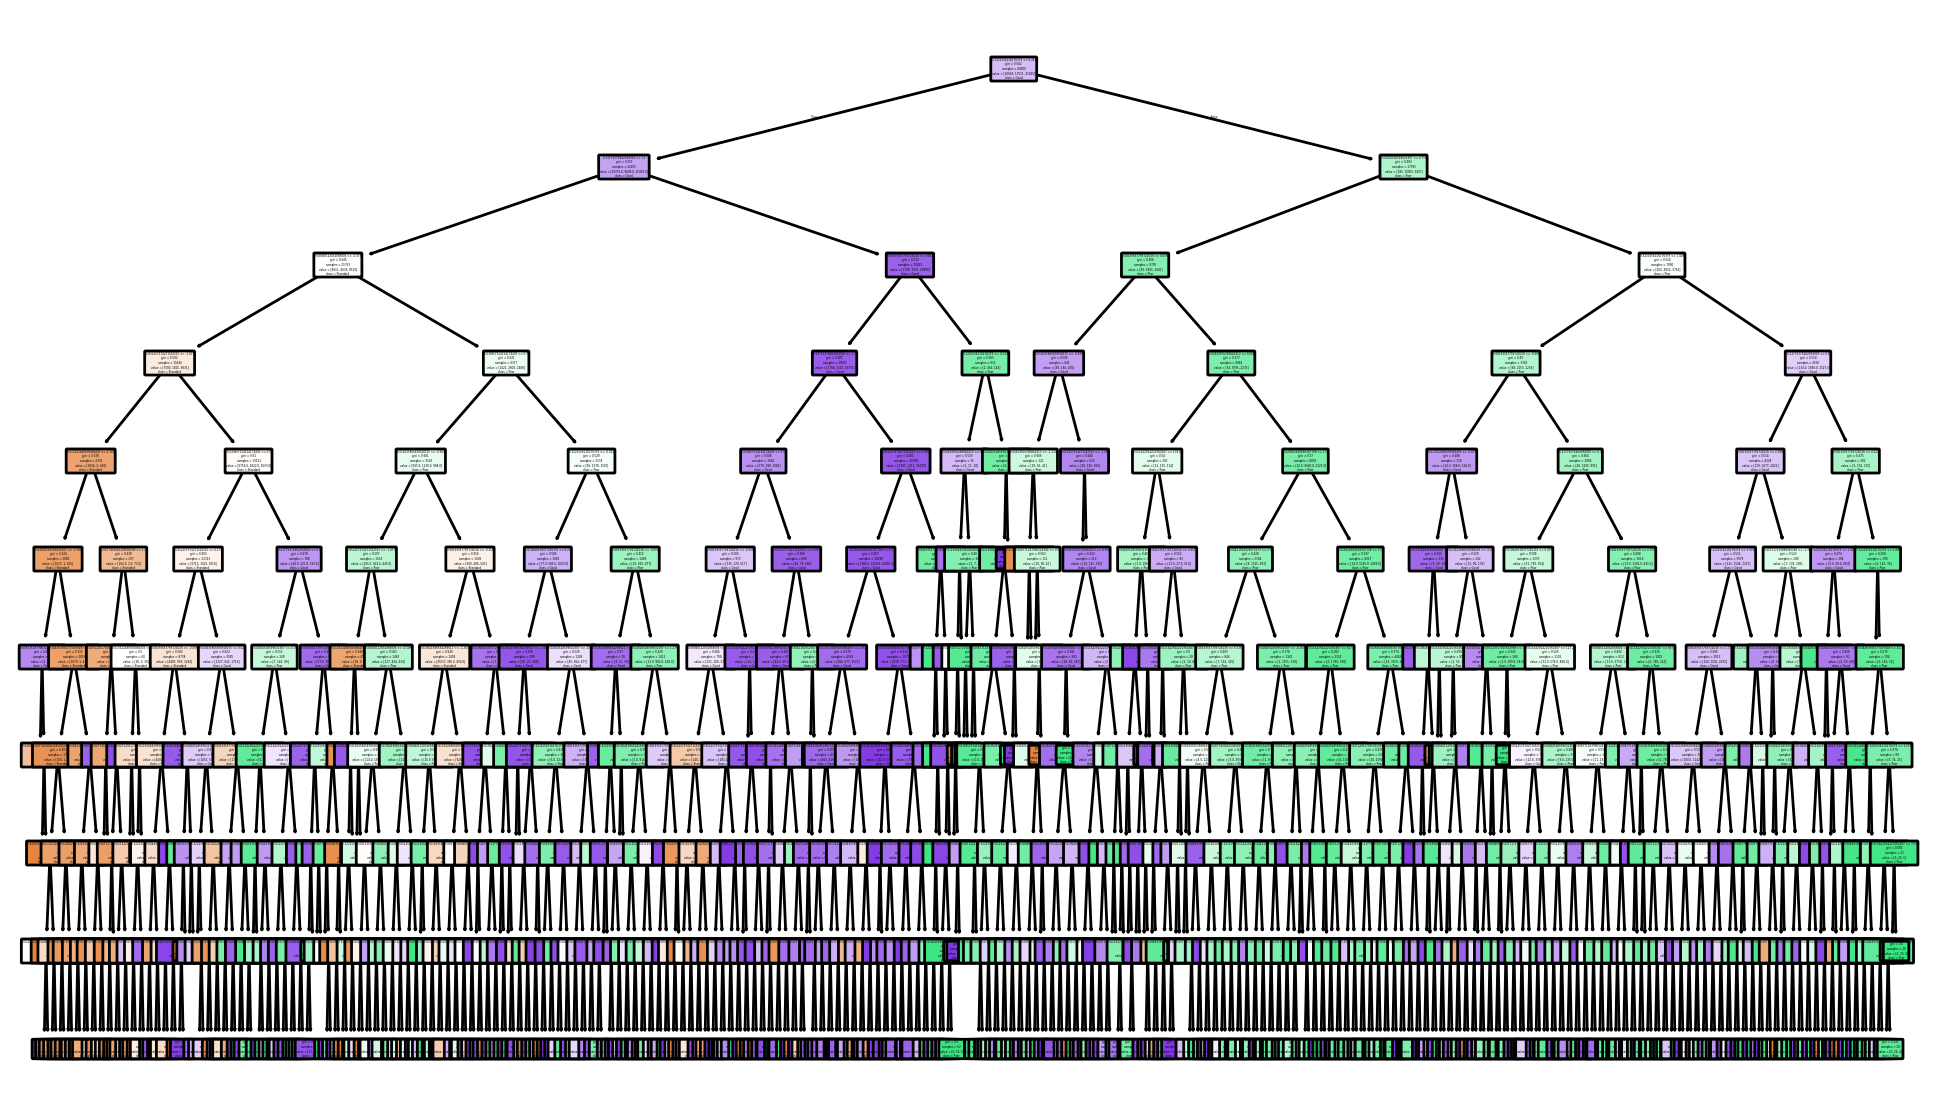

In [ ]:
class_names = ['Standard', 'Poor', 'Good']
plt.figure(dpi=200, figsize=(12, 7))
plot_tree(model_DTC2, rounded=True, filled=True, class_names=class_names, feature_names=model_DTC2.feature_importances_)

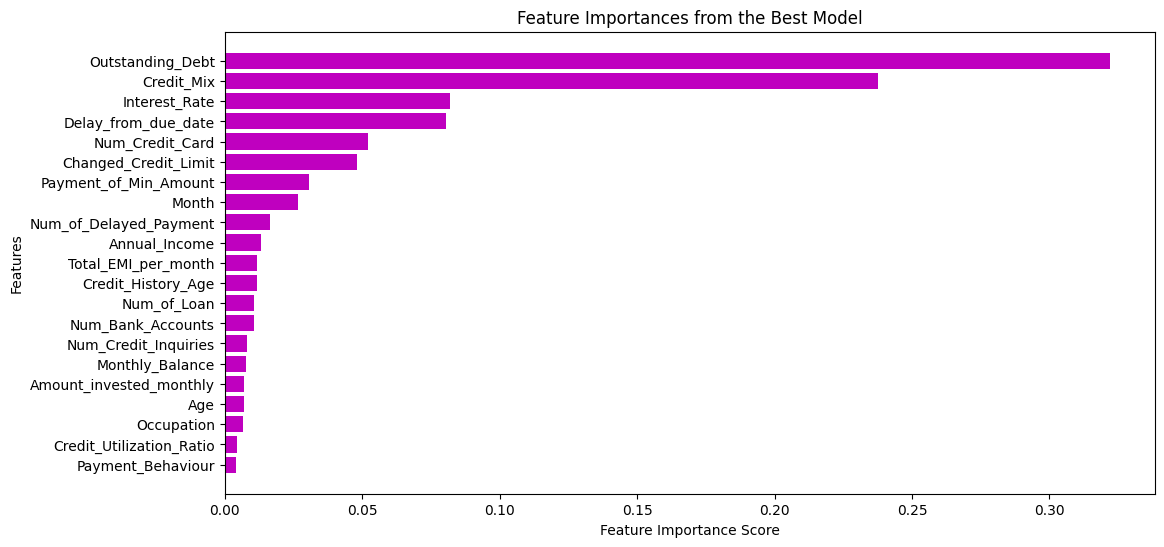

In [ ]:

feature_names = X_train.columns

feature_importances = model_DTC2.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='m')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from the Best Model")
plt.gca().invert_yaxis()
plt.show()


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
best_estimator_random=random_search_model.best_estimator_
best_estimator_grid=grid_search_model.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
models=[model_DTC,model_DTC2,best_estimator_random,best_estimator_grid]

for model in models:
    print(f'{model}\n ----------------')

    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

DecisionTreeClassifier(random_state=1234)
 ----------------
Accuracy: 0.6733
Precision: 0.6735
Recall: 0.6733
F1 Score: 0.6734
Confusion Matrix:
[[2140  238 1254]
 [ 205 3796 1758]
 [1300 1780 7529]]
DecisionTreeClassifier(max_depth=10, max_leaf_nodes=1000)
 ----------------
Accuracy: 0.7029
Precision: 0.7080
Recall: 0.7029
F1 Score: 0.7042
Confusion Matrix:
[[2490  111 1031]
 [ 388 3785 1586]
 [1438 1388 7783]]
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=0.7,
                       max_leaf_nodes=15, min_samples_leaf=10,
                       min_samples_split=0.1, min_weight_fraction_leaf=0.05)
 ----------------
Accuracy: 0.6540
Precision: 0.6642
Recall: 0.6540
F1 Score: 0.6566
Confusion Matrix:
[[2242  400  990]
 [ 425 3890 1444]
 [1517 2145 6947]]
DecisionTreeClassifier(max_depth=15, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.1)
 ------------

c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred=model_DTC2.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Standard       0.58      0.69      0.63      3632
        Poor       0.72      0.66      0.69      5759
        Good       0.75      0.73      0.74     10609

    accuracy                           0.70     20000
   macro avg       0.68      0.69      0.68     20000
weighted avg       0.71      0.70      0.70     20000



----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$